# Projekt

1. Stwórz dla domu maklerskiego graficzny dashboard, który pozwoli na podejmowanie decyzji o zakupie lub sprzedaży akcji Facebooka lub innych spółek. W tym celu wyświetl ceny akcji razem z średnią kroczącą z ostatnich 14 dni. Gdy aktualna cena spadnie poniżej średniej, to znak, że jesteśmy na górce i trzeba sprzedawać. Dodatkowo w dashboardzie umieść informacje o wolumenie sprzedaży, aby móc wykrywać nietypowe zdarzenia. Użyj w tym celu drugiej osi Y.

2. Notowania Facebooka ściągniesz stąd: https://www.nasdaq.com/market-activity/stocks/fb/historical Możesz także pobrać notowania innych interesujących Cię spółek. Te same dane znajdziesz także w pliku M08/data/fb.csv.

3. Zauważysz, że dane są posortowane od najnowszych do najstarszych. Jak odwrócisz tę kolejność? Poszukaj!

4. Wyceny akcji są poprzedzone znakiem dolara, np. `$80.20`. Napisz funkcję, która przyjmuje pojedynczy string, usuwa znak dolara i zwraca float'a. Użyj metody `.map()` na pojedynczej kolumnie, aby wyzwolić tę funkcję na każdym wierszu danych.

In [4]:
import pandas as pd

fb = pd.read_csv(
    'data/fb.csv',
    parse_dates=['Date'],
    index_col="Date",
).rename(columns={
    'Close/Last':'close',
    'Open':'open',
    'High':'high',
    'Low':'low',
    'Volume':'volume'
}).sort_index()


,close,volume,open,high,low
Date,,,,,
2012-05-18,$38.2318,579377500,$42,$45,$38
2012-05-21,$34.03,167943600,$36.53,$36.66,$33
2012-05-22,$31,101667700,$32.61,$33.59,$30.94
2012-05-23,$32,73541150,$31.37,$32.5,$31.36
2012-05-24,$33.03,50208760,$32.95,$33.21,$31.77
...,...,...,...,...,...
2021-09-23,$345.96,21806260,$345.355,$349.67,$343
2021-09-24,$352.96,18801930,$343.239,$354.35,$342.37
2021-09-27,$353.58,15205840,$349.805,$355.15,$347.08


In [10]:
def remove_dollar(x):
    return float(x[1:])

fb = fb.assign(
    close=fb['close'].map(remove_dollar),
    open=fb['open'].map(remove_dollar),
    high=fb['high'].map(remove_dollar),
    low=fb['low'].map(remove_dollar),
)


,close,volume,open,high,low
Date,,,,,
2012-05-18,38.2318,579377500,42.000,45.00,38.00
2012-05-21,34.0300,167943600,36.530,36.66,33.00
2012-05-22,31.0000,101667700,32.610,33.59,30.94
2012-05-23,32.0000,73541150,31.370,32.50,31.36
2012-05-24,33.0300,50208760,32.950,33.21,31.77
...,...,...,...,...,...
2021-09-23,345.9600,21806260,345.355,349.67,343.00
2021-09-24,352.9600,18801930,343.239,354.35,342.37
2021-09-27,353.5800,15205840,349.805,355.15,347.08


In [11]:
fb = fb.assign(mean = fb['close'].rolling('14D').mean())
fb

,close,volume,open,high,low,mean
Date,,,,,,
2012-05-18,38.2318,579377500,42.000,45.00,38.00,38.23180
2012-05-21,34.0300,167943600,36.530,36.66,33.00,36.13090
2012-05-22,31.0000,101667700,32.610,33.59,30.94,34.42060
2012-05-23,32.0000,73541150,31.370,32.50,31.36,33.81545
2012-05-24,33.0300,50208760,32.950,33.21,31.77,33.65836
...,...,...,...,...,...,...
2021-09-23,345.9600,21806260,345.355,349.67,343.00,364.57800
2021-09-24,352.9600,18801930,343.239,354.35,342.37,362.00500
2021-09-27,353.5800,15205840,349.805,355.15,347.08,359.71200


<AxesSubplot: xlabel='Date'>

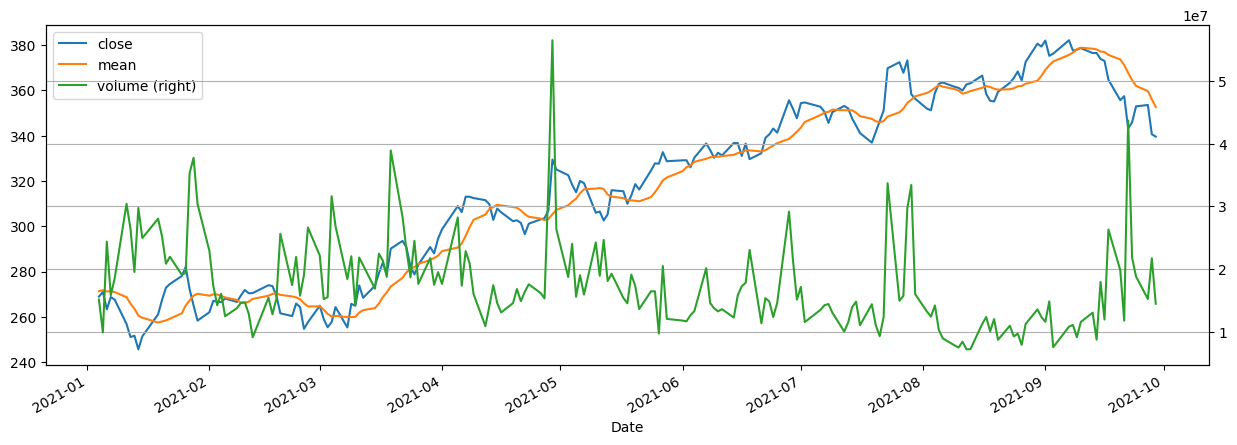

In [14]:
from_ = '2021'
to = '2022'

fb[from_:to].plot(
    y=['close', 'mean', 'volume'],
    figsize=(15,5),
    grid=True,
    secondary_y=['volume'],
)